<a href="https://colab.research.google.com/github/imranrahman1997/Neural-Network-from-scratch/blob/main/Learn_Neural_Network_From_Scratch_with_imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Making a Nural network from scratch with imdb data set

In [1]:
import tensorflow as tf
import keras

In [2]:
#Import imdb dataset from keras library
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

here’s how you can quickly decode one of these reviews back to English
words

In [5]:
word_index = imdb.get_word_index() # dictionary mapping words to an integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

Encoding the integer sequences into a binary matrix  
We use one-hot encoding method. Turn the list into a vector of 0 and 1.

In [6]:
import numpy as np
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

In [7]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [8]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Now vectorized labels which is straightforward

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [11]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
from keras import models
from keras import layers

model =models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

Configuring the optimizer

In [15]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

Setting validation set

In [16]:
x_val = x_train[: 10000]
partial_x_train = x_train[10000:]

In [17]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5154 - accuracy: 0.7942 - val_loss: 0.4040 - val_accuracy: 0.8591
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3144 - accuracy: 0.9025 - val_loss: 0.3154 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2270 - accuracy: 0.9274 - val_loss: 0.3426 - val_accuracy: 0.8577
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1823 - accuracy: 0.9404 - val_loss: 0.2721 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1468 - accuracy: 0.9552 - val_loss: 0.2777 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1233 - accuracy: 0.9617 - val_loss: 0.3070 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1018 - accuracy: 0.9698 - val_loss: 0.3028 - val_accuracy: 0.8868
Epoch 8/20
30

Plotting the training and validation loss

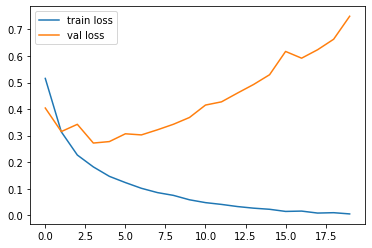

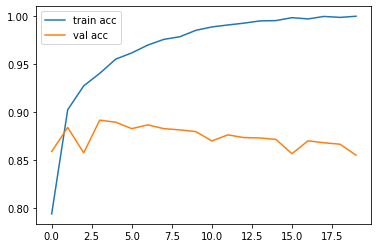

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss
r = history
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.8440 - accuracy: 0.8403


[0.8440205454826355, 0.8403199911117554]

In [21]:
model.predict(x_test)

array([[0.00367856],
       [1.        ],
       [0.34894764],
       ...,
       [0.00100332],
       [0.00355941],
       [0.54463327]], dtype=float32)

In [22]:
print(np.argmax(model.predict(x_test)))

1
